#Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans # 비지도학습 클러스터링 알고리즘 중 하나
from sklearn.decomposition import PCA # 주성분분석, 비지도학습 알고리즘 중 하나

# Fruit datasets

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
# !linux명령어
# wget 파일저장위치(URL) -O 파일이름: URL에서 데이터를 다운로드해서 파일에 저장.

--2022-06-29 00:49:52--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-06-29 00:49:53--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-06-29 00:49:53--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

npy 파일: numpy의 배열을 저장한 파일 타입
* `np.save(file,arr): 배열 arr을 파일 file에 npy포맷으로 저장.
* `np.load(file): npy 포맷으로 저장된 파일을 읽어서 배열을 복원.

In [3]:
fruits = np.load('fruits_300.npy')

In [4]:
fruits.shape  # (n_samples, height, width)

(300, 100, 100)

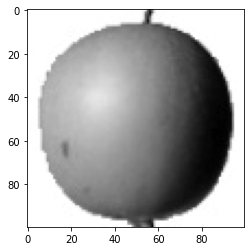

In [5]:
# 첫번째 이미지 시각화
img = fruits[0]
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [6]:
# 10x10 subplot을 생성해서 이미지 100개 씩 시각화

In [7]:
def plot_fruits(arr, n_rows=10, n_cols=10, start=0):
    # n_rows x n_cols 개수의 subplot들을 생성
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 10))
    for i in range(n_rows):
        for j in range(n_cols):
            img = arr[start + i * n_cols + j]  # subplot에 그릴 이미지
            ax[i, j].imshow(img, cmap=plt.cm.binary)
            ax[i, j].axis('off')
    plt.show()

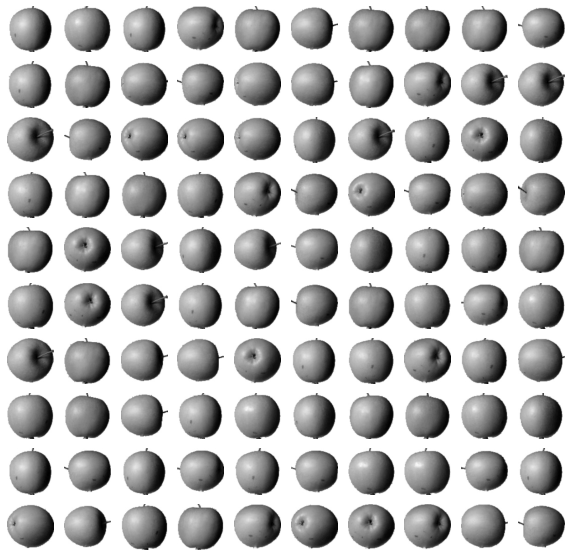

In [8]:
plot_fruits(fruits)

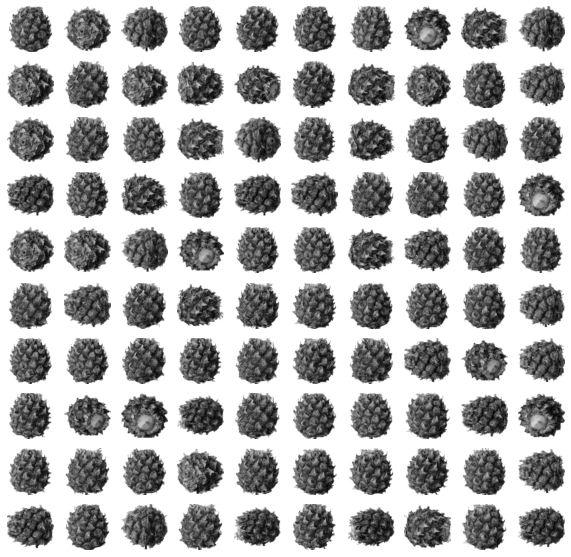

In [9]:
plot_fruits(fruits, start=100)

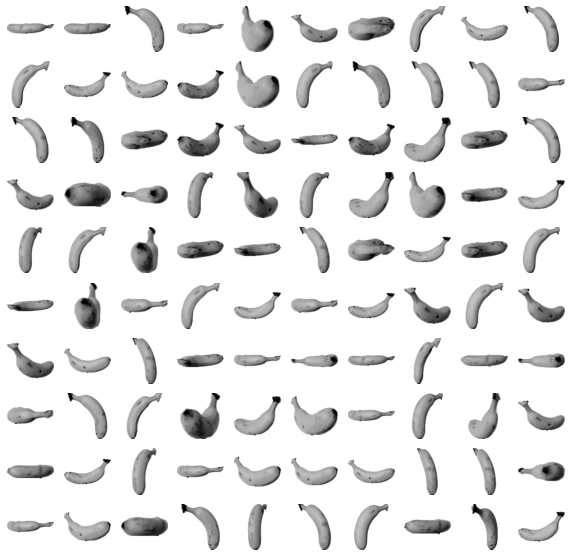

In [10]:
plot_fruits(fruits, start=200)

# Pixel 분석

In [11]:
# (300, 100, 100) shape의 3차원 배열을 (300, 100*100) shape의 2차원 배열로 변환
apple = fruits[:100, :, :].reshape((100, -1))  # (100, 100*100)
pineapple = fruits[100:200, :, :].reshape((100, -1))
banana = fruits[200:, :, :].reshape((100, -1))

In [12]:
apple.shape, pineapple.shape, banana.shape
# shape: (n_samples, n_pixels)

((100, 10000), (100, 10000), (100, 10000))

## 각 샘플(각각의 과일)에서 픽셀들의 평균값

In [13]:
apple_mean = np.mean(apple, axis=1)
apple_mean

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

In [14]:
pineapple_mean = np.mean(pineapple, axis=1)
banana_mean = np.mean(banana, axis=1)

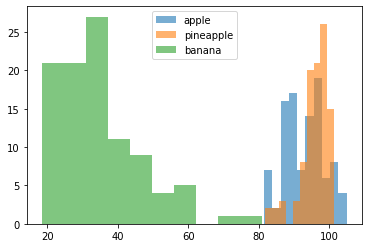

In [15]:
# 과일의 픽셀 평균값의 분포 - 히스토그램
plt.hist(apple_mean, alpha=0.6, label='apple')
plt.hist(pineapple_mean, alpha=0.6, label='pineapple')
plt.hist(banana_mean, alpha=0.6, label='banana')
plt.legend()
plt.show()

## 각 픽셀 별로 평균 분석

In [16]:
apple_px_mean = np.mean(apple, axis=0)
pineapple_px_mean = np.mean(pineapple, axis=0)
banana_px_mean = np.mean(banana, axis=0)

In [17]:
apple_px_mean.shape, pineapple_px_mean.shape, banana_px_mean.shape

((10000,), (10000,), (10000,))

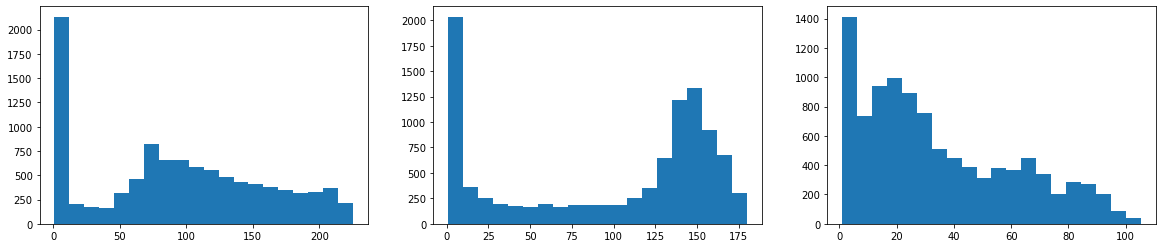

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
ax[0].hist(apple_px_mean, bins=20)
ax[1].hist(pineapple_px_mean, bins=20)
ax[2].hist(banana_px_mean, bins=20)

plt.show()

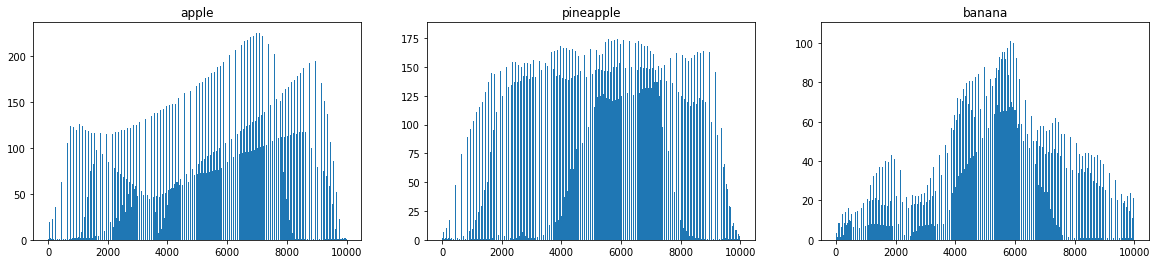

In [19]:
# 각 픽셀 평균값의 크기를 막대 그래프로 표현
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
x_values = np.arange(100 * 100)  # 0 ~ 9999
ax[0].bar(x_values, apple_px_mean)
ax[0].set_title('apple')
ax[1].bar(x_values, pineapple_px_mean)
ax[1].set_title('pineapple')
ax[2].bar(x_values, banana_px_mean)
ax[2].set_title('banana')

plt.show()

각 픽셀들의 평균값 배열(shape: (10000,))을 (100, 100) shape의 2차원 배열로 변환해서 이미지로 그림.

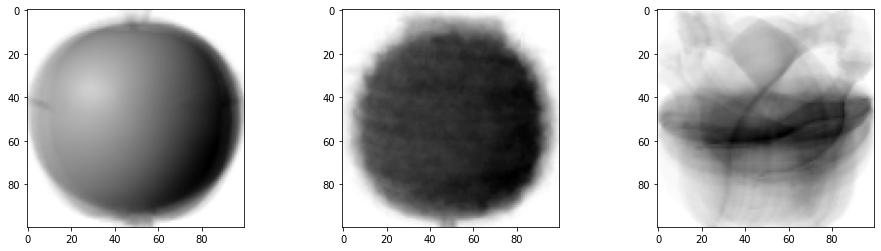

In [20]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4))
ax[0].imshow(apple_px_mean.reshape((100, 100)), cmap=plt.cm.binary)
ax[1].imshow(pineapple_px_mean.reshape((100, 100)), cmap=plt.cm.binary)
ax[2].imshow(banana_px_mean.reshape((100, 100)), cmap=plt.cm.binary)

plt.show()

# 픽셀들의 평균값과 가까운 이미지 찾기

* diff = 실제 픽셀값 - 픽셀 평균값
* diff의 절대값
* diff 절대값들의 평균
* diff 절대값 평균이 작은 순서로 선택

In [21]:
fruits_2d = fruits.reshape((300, -1))
fruits_2d.shape  # (n_samples, n_pixels)

(300, 10000)

## 사과 픽셀 평균값과 가까운 이미지 찾기

In [22]:
diff = fruits_2d - apple_px_mean  # 실젯값과 평균값의 차이
diff_abs = np.abs(diff)  # 차이들의 절대값
diff_abs_mean = np.mean(diff_abs, axis=1)  # 차이의 절대값들의 평균
diff_abs_mean  #> shape: (300,)

array([17.37576 , 13.508874, 17.183394, 15.68311 , 17.983306, 20.565392,
       16.795812, 16.144276, 19.611994, 21.32059 , 16.454222, 16.590134,
       13.37039 , 17.23263 , 15.92806 , 15.496638, 18.582212, 16.48196 ,
       27.651556, 19.7871  , 20.826912, 16.417934, 17.059946, 15.904296,
       15.086176, 19.371364, 24.076362, 14.777732, 19.20517 , 20.805182,
       14.797906, 18.658418, 15.973216, 13.04259 , 18.381052, 16.59904 ,
       16.288504, 18.960586, 13.88574 , 16.497594, 18.40376 , 19.174642,
       29.096702, 18.40849 , 28.223962, 21.42994 , 19.740466, 15.590532,
       13.082678, 18.765996, 14.391198, 21.464746, 26.261028, 15.887148,
       18.568706, 16.410426, 17.108034, 13.178824, 18.199846, 13.503056,
       20.845032, 16.898184, 22.81774 , 18.99896 , 19.102706, 16.636216,
       14.845644, 19.357872, 14.778086, 14.468082, 13.085526, 15.946606,
       20.42774 , 16.241996, 13.720382, 18.416166, 15.229106, 16.411342,
       13.47148 , 20.050622, 17.296816, 21.071312, 

In [23]:
# np.argsort(arr): 배열 arr을 (오름차순) 정렬한 인덱스를 리턴.
apple_like_idx = np.argsort(diff_abs_mean)
apple_like_idx[:100]

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 68,
       30, 66, 24, 76, 98, 15, 84, 47, 90,  3, 94, 53, 23, 14, 71, 32,  7,
       73, 36, 55, 77, 21, 10, 17, 39, 99, 95, 11, 35, 65,  6, 61, 22, 56,
       89,  2, 13, 80,  0, 97,  4, 58, 34, 40, 43, 75, 82, 54, 16, 31, 49,
       93, 37, 63, 64, 41, 28, 67, 25, 96,  8, 83, 46, 19, 79, 72,  5, 85,
       29, 20, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42])

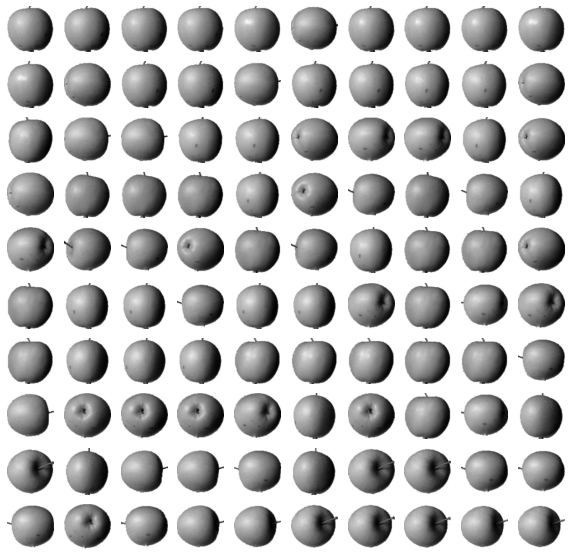

In [24]:
apple_like = fruits[apple_like_idx]
plot_fruits(apple_like)

## 파인애플 픽셀 평균값과 비슷한 이미지 찾기

In [25]:
abs_diff= np.abs(fruits_2d - pineapple_px_mean) # (실젯값-평균)의 절댓값
mean_abs_diff = np.mean (abs_diff, axis=1) # (실젯값- 평균)의 절대값들의 평균
pineapple_like_idx = np.argsort(mean_abs_diff) # 오름차순 정렬한 인덱스 리턴.
pineapple_like_idx

array([111, 152, 164, 137, 136, 129, 166, 150, 165, 101, 174, 192, 117,
       140, 182, 184, 148, 181, 100, 193, 191, 120, 175, 162, 154, 157,
       155, 186, 121, 103, 122, 145, 138, 161, 118, 176, 160, 127, 144,
       156, 158, 105, 104, 102, 188, 124, 112, 198, 185, 177, 133, 125,
       131, 109, 180, 110, 106, 149, 115, 187, 163, 170, 141, 159, 183,
       142, 128, 195, 147, 167, 119, 189, 190, 151, 135, 169, 123, 171,
       143, 168, 107, 113, 108, 139, 130, 197, 134, 116, 199, 172,  77,
       179, 146, 178, 194, 114, 173, 196,  32,  46,  71, 126, 132, 153,
        29,  15,  69,  79,   7,  12,  98,  63,  39,  11,  35,  24,  25,
        90,  38,  72,   6,  23,  19,   5,  96,  51,  55,  36,  41,  26,
        10,  65,  43,  75,  82,  61,  95,  20,  99,  21,  89,  22,  80,
         2,  28,  56,  60,  64,  14,   0,  52,  53,  18,  73,  67,  62,
        30,  84,  13,  34,  66,  47,  91,  97,   4,  48,  70,  33,  57,
         1,  27,  59,  78,  49,  40,  87,  68,  93,  37,  76,  5

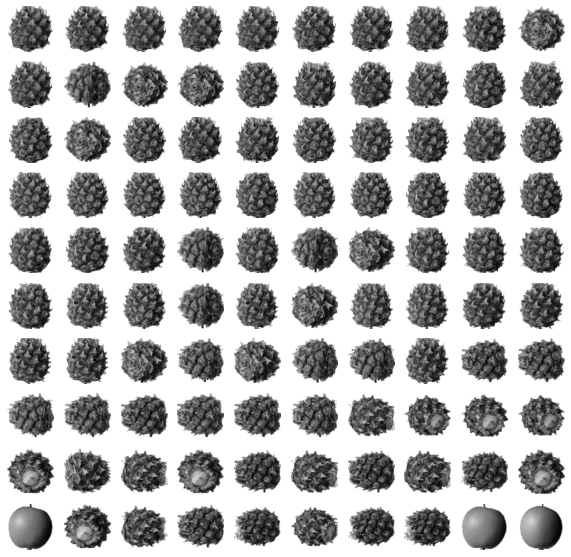

In [26]:
plot_fruits(fruits[pineapple_like_idx])

## 바나나 픽셀 평균값과 비슷한 이미지 찾기

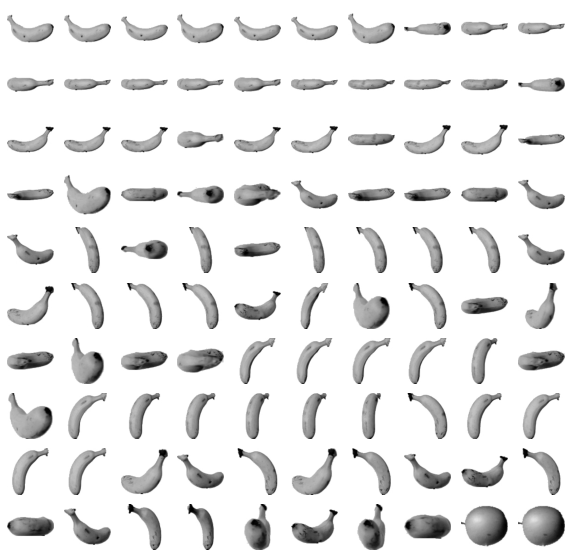

In [27]:
abs_diff = np.abs(fruits_2d - banana_px_mean)
mean_abs_diff = np.mean(abs_diff, axis=1)
banana_like_idx = np.argsort(mean_abs_diff)
plot_fruits(fruits[banana_like_idx])

# K-means Clustering(K-평균 군집화)

1. 무작위로 k개의 클러스터들의 중심을 설정.
1. 각 샘플에서 가장 가까운 클러스터의 중심을 찾아서 해당 클러스터의 샘플로 지정.
1. 각 클러스터에 속한 샘플들의 평균값으로 클러스터의 중심을 이동.
1. 2~3번 과정을 클러스터의 중심의 변화가 없을 때까지 반복.

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42) #KMeans 객체 생성

In [29]:
kmeans.fit(fruits_2d)
# 데이터(X)만 학습. 비지도학습에는 레이블(y(1차원 배열))을 넘기지 않는다.

KMeans(n_clusters=3, random_state=42)

In [30]:
kmeans.labels_ #KMeans가 3개(클러스터 개수)의 레이블을 생성.

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [31]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))

In [32]:
kmeans.cluster_centers_ #kmeans가 찾은 클러스의 중심

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.01098901, 1.01098901, 1.01098901, ..., 1.        , 1.        ,
        1.        ]])

In [33]:
kmeans.cluster_centers_.shape

(3, 10000)

KMeans가 찾은 각 레이블의 샘플들을 시각화

In [34]:
def plot_cluster(arr):
    n = len(arr) # 배열의 원소 개수
    ncols = 10 # 한 줄(하나의 행)에 이미지 10개씩 그리겠다.
    nrows = int(np.ceil(n / ncols)) # subplot의 행의 개수
    fig , ax = plt.subplots(nrows, ncols, figsize=(10,10))
    for i in range(nrows):
        for j in range(ncols):
            idx = i* ncols + j # 배열 arr의 인덱스
            if idx < n : # 인덱스가 샘플 개수보다 크면 안되기 때문에!
                img = arr[idx].reshape((100,100))
                # (10000,) shape의 1차원 배열을 (100,100) 2차원 shape으로 변환
                ax[i,j].imshow(img, cmap=plt.cm.binary)
            ax[i,j].axis('off')
    plt.show()

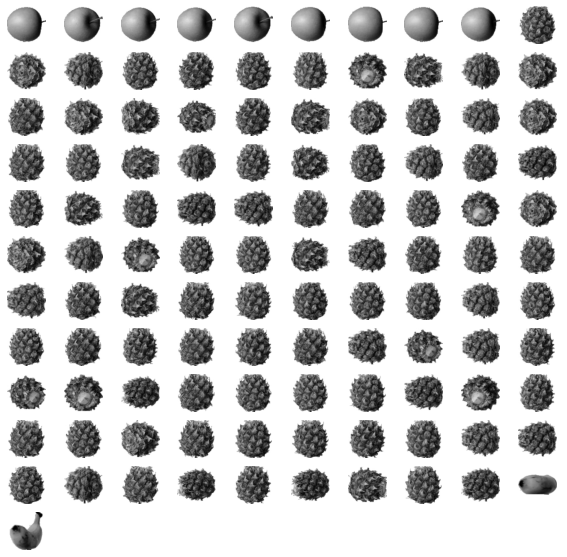

In [35]:
plot_cluster(fruits_2d[kmeans.labels_ == 0])

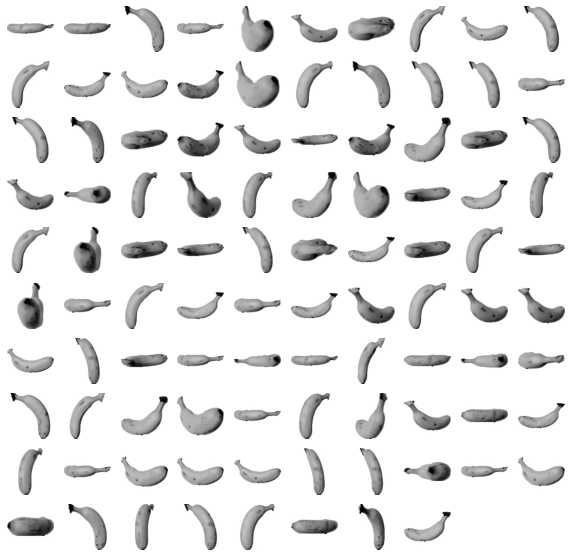

In [36]:
plot_cluster(fruits_2d[kmeans.labels_ == 1])

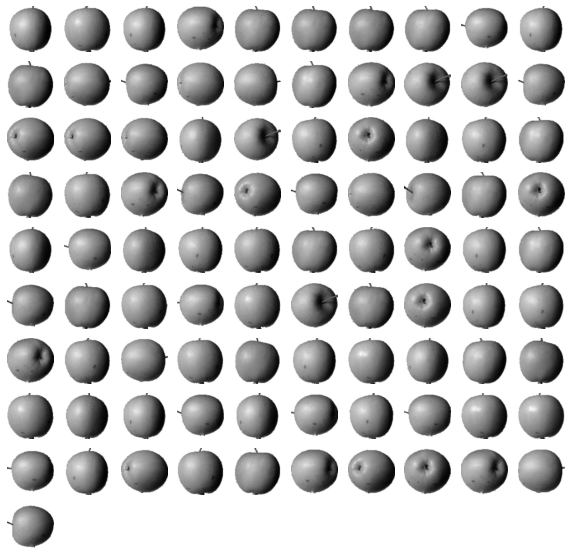

In [37]:
plot_cluster(fruits_2d[kmeans.labels_ == 2])

KMean가 찾은 `cluster_centers_` : 클러스터들의 중심(centroid)

In [38]:
kmeans.cluster_centers_ #shape: (3,10000)

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.01098901, 1.01098901, 1.01098901, ..., 1.        , 1.        ,
        1.        ]])

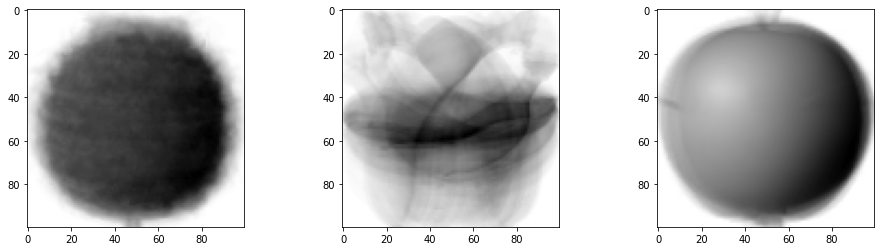

In [39]:
fig, ax = plt.subplots(ncols=3, figsize=(16,4))
for i , centroid in enumerate(kmeans.cluster_centers_):
    img = centroid.reshape((100,100))
    ax[i].imshow(img, cmap=plt.cm.binary)
plt.show()

## 훈련 샘플에서 클러스터들의 중심까지의 거리 계산

In [40]:
distances = kmeans.transform(fruits_2d)
# transform으로 거리를 계산.

In [41]:
distances.shape # (n_samples, n_clusters)
# 각 샘플에서 클러스터 중심들까지의 거리

(300, 3)

In [42]:
distances[:6]

array([[4677.10527943, 8642.61845541, 3087.33092099],
       [5363.9344124 , 9030.55531495, 2641.34592861],
       [4637.76848934, 8494.99543011, 3122.48819955],
       [5319.2368841 , 9132.8299753 , 3032.41637343],
       [5039.67898148, 8461.52728232, 2656.96823141],
       [4368.90682127, 7855.57817995, 4874.81067384]])

In [43]:
labels = np.argmin(distances, axis=1)
# 3개의 클러스터 중심들까지의 거리들 중 최솟값
labels[:6]

array([2, 2, 2, 2, 2, 0])

In [44]:
kmeans.predict(fruits_2d[:10]) # centroid들까지의 거리 계산하고 가장 짧은 거리의 인덱스를 리턴.

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2], dtype=int32)

## 최적의 K 값 찾기


`inertia`:

*   클러스터의 중심과 클러스터에 속한 샘플들 사이의 거리들의 제곱의 합
*   클러스터에 속한 샘플들이 얼마나 가깝게 모여 있는지를 나타내는 값
 * inertia가 작으면, 샘플들이 클러스터 중심에서 가깝게 모여있음.
 * inertia가 크면, 샘플들이 클러스터 중심에서 멀리 퍼져 있음.
*   일반적으로, 클러스터의 개수가 많을 수록 inertia 값은 작아짐.


In [45]:
kmeans.inertia_ # k=3일 때 inertia

5074977316.088373

In [46]:
# k값을 2~7까지 변화시키면서 inertia를 계산하고 시각화
inertias = []
k_values = np. arange(2,8)
for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(fruits_2d)
    inertias.append(kmeans.inertia_)
print(inertias)

[5856532545.983113, 5074977316.088373, 4673588404.856072, 4344167864.512113, 3997030130.9539833, 3776049057.608836]


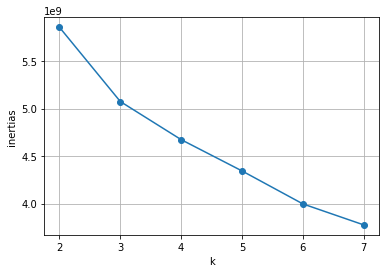

In [47]:
plt.plot(k_values,inertias,'o-')
plt.grid()
plt.xlabel('k')
plt.ylabel('inertias')
plt.show()

* k값을 변화시켜가면서 inertia가 급격하게 줄어드는 값이 제일 최적의 값이며 그것을 엘보우라고 부른다.
 * k값을 증가시키면 inertia는 계속 작아짐 
 * k값에 따라서 inertia의 기울기가 크게 줄어들다가, 그다음 기울기가 완만하게 줄어듦.
 * 기울기의 차이가 많이 생기는 부분을 팔꿈치라고 말하며 elbow라고 부른다.
 * => 그 위치가 가장 최적의 K값이다. 3번일때 가장 최적의 값이다.

# Exercise

* iris 데이터 셋 사용
* k=[2,7) 값에 따른 inertia를 계산하고 시각화
* k=3일 때, KMeans가 찾은 클러스터 중심을 출력하고, petal_length ~ petal_width만 시각화
* k=3일 때, KMeans가 찾은 label과 실제 label을 비교

In [82]:
from sklearn import datasets

In [83]:
X, y = datasets.load_iris(return_X_y=True)

* k=[2,7) 값에 따른 inertia를 계산하고 시각화

In [84]:
# k값을 2~7까지 변화시키면서 inertia를 계산하고 시각화
inertias = []
k_values = np. arange(2,8)
for k in k_values:
    kme = KMeans(n_clusters=k,random_state=42)
    kme.fit(X)
    inertias.append(kme.inertia_)
print(inertias)

[152.3479517603579, 78.851441426146, 57.22847321428572, 46.446182051282065, 39.03998724608726, 34.46949589883801]


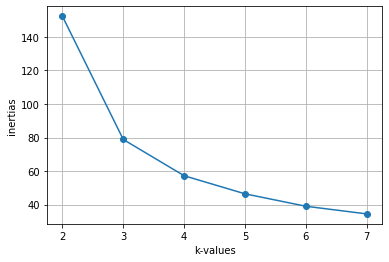

In [85]:
plt.plot(k_values,inertias,'o-')
plt.grid()
plt.xlabel('k-values')
plt.ylabel('inertias')
plt.show()
# 최적의 값 = 3

* k=3일 때, KMeans가 찾은 클러스터 중심을 출력하고, petal_length ~ petal_width만 시각화

In [86]:
# k=3 인 kmeans clustering:
kme = KMeans(n_clusters=3, random_state=42)

In [87]:
kme.fit(X)

KMeans(n_clusters=3, random_state=42)

In [88]:
kme.labels_ #Kme가 3개(클러스터 개수)의 레이블을 생성.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [89]:
np.unique(kme.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([62, 50, 38]))

In [90]:
vari = kme.cluster_centers_
vari

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

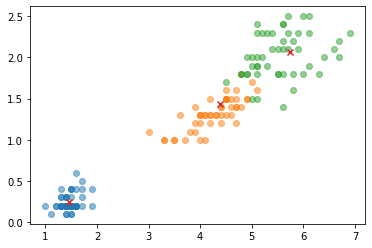

In [91]:
for n in np.unique(y):
    plt.scatter(X[y==n, 2], X[y==n, 3], alpha=0.5)
petal_centroids = kme.cluster_centers_[:,2:]
plt.scatter(petal_centroids[:,0], petal_centroids[:,1],
            marker='x')

plt.show()

In [92]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [93]:
kme.cluster_centers_.shape

(3, 4)

In [94]:
kme.inertia_

78.851441426146

In [95]:
# X = iris[['petal_length','petal_width']]
# X.head()

In [96]:
# model = KMeans(n_clusters=3)
# model.fit(X)
# predict = pd.DataFrame(model.predict(X))
# predict.columns=['pred']

# # concatenate labels to df as a new column
# result = pd.concat([X,predict],axis=1)

# print(result)

In [97]:
# centers = pd.DataFrame(model.cluster_centers_,columns=['petal_length','petal_width'])
# center_x = centers['petal_length']
# center_y = centers['petal_width']

# # scatter plot
# plt.scatter(result['petal_length'],result['petal_width'],
#             c=result['pred'],alpha=0.5)
# plt.scatter(center_x,center_y,s=50,marker='D',c='r')
# plt.show()

* k=3일 때, KMeans가 찾은 label과 실제 label을 비교

In [98]:
print(y) #실제 레이블
print(np.unique(y,return_counts=True))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(array([0, 1, 2]), array([50, 50, 50]))


In [99]:
print(kme.labels_) #kmeans가 찾은 레이블
print(np.unique(kme.labels_, return_counts=True))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
(array([0, 1, 2], dtype=int32), array([62, 50, 38]))


In [100]:
kme.predict(X[:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

# PCA(Principal Component Analysis, 주성분분석)

*   PCA 순서:
    *   훈련 셋에서 분산의 가장 많은 부분을 설명하는 축(axis)을 찾음.
    *   그 축에 수직(othogoanl)이면서 남은 분산의 가장 많은 부분을 설명하는 축을 찾음.
    *   이전의 두 축에 모두 수직이면서 남은 분산의 가장 많은 부분을 설명하는 축을 찾음.
    *   반복

*   설명된 분산 비율(explained variance ratio): 데이터 셋의 분산이 각 주성분 축에 따라 놓여 있는 비율.
*   PCA는 주성분의 개수 또는 설명된 분산 비율을 설정해서 데이터 셋의 차원을 축소하는 사용.

In [101]:
fruits.shape # (n_samples, height, width)

(300, 100, 100)

In [102]:
fruits_2d.shape # (n_samples, n_pixels = height*width)

(300, 10000)

In [103]:
pca = PCA(n_components=50) # 주성분(pricipal components)50개를 찾는 pca

In [104]:
pca.fit(fruits_2d) # 학습(훈련) - 주성분을 찾음

PCA(n_components=50)

In [106]:
pca.components_.shape # pca가 찾은 주성분 50개 - (n_components, n_features)

(50, 10000)

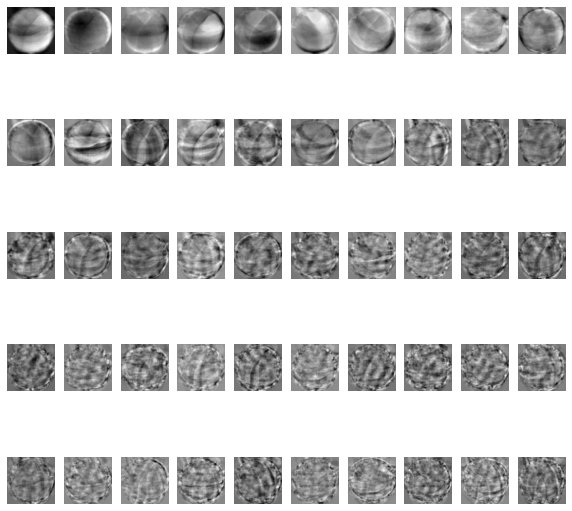

In [107]:
plot_cluster(pca.components_)

## 차원 축소 : `pca.trasnform(X)`

In [108]:
fruits_2d_pca = pca.transform(fruits_2d)

In [109]:
fruits_2d_pca.shape # (n_samples, n_features)

(300, 50)

## 차원 재구성: `(pca.inverse_transform(X)`

In [110]:
fruits_2d_inv = pca.inverse_transform(fruits_2d_pca)

In [111]:
fruits_2d_inv.shape # (n_smaples, n_features)

(300, 10000)

원본 이미지와 차원이 재구성된 이미지 비교

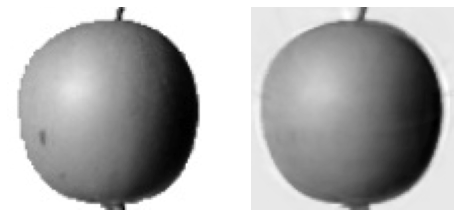

In [113]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
ax[0].imshow(fruits[0], cmap = plt.cm.binary)
ax[0].axis('off')
# pca 차원 축소 후 재구성된 이미지
img_inv = fruits_2d_inv[0].reshape((100,100)) # 원소 하나 꺼내면 1차원이 되기 때문에 다시 2차원으로 만들어줌
ax[1].imshow(img_inv, cmap=plt.cm.binary)
ax[1].axis('off')

plt.show()

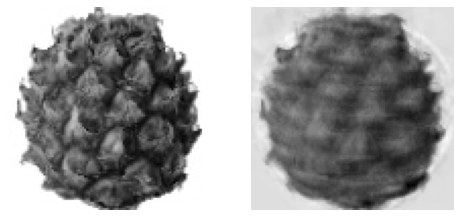

In [114]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
ax[0].imshow(fruits[100], cmap = plt.cm.binary)
ax[0].axis('off')
# pca 차원 축소 후 재구성된 이미지
img_inv = fruits_2d_inv[100].reshape((100,100))
ax[1].imshow(img_inv, cmap=plt.cm.binary)
ax[1].axis('off')

plt.show()

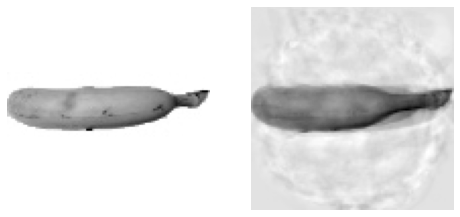

In [115]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
ax[0].imshow(fruits[200], cmap = plt.cm.binary)
ax[0].axis('off')
# pca 차원 축소 후 재구성된 이미지
img_inv = fruits_2d_inv[200].reshape((100,100))
ax[1].imshow(img_inv, cmap=plt.cm.binary)
ax[1].axis('off')

plt.show()

## 설명된분산 (explained variance)

In [116]:
pca.explained_variance_

array([13825250.21582   ,  3244970.17261193,  2147002.11072804,
        1315766.76701663,  1115261.57182824,  1071019.42512486,
         839909.33515125,   670735.9720751 ,   447908.41086816,
         438278.50227562,   376058.33824326,   308314.26975047,
         286653.1484123 ,   276360.40730273,   226209.93890138,
         210588.31748215,   188950.50055548,   166854.8977497 ,
         158754.34932913,   156783.57309489,   146172.65067794,
         142739.78452565,   133183.19171769,   127120.02169218,
         121561.55773785,   117270.13284346,   108190.23283245,
         103742.54683914,    99336.72426203,    99121.07554467,
          94273.97170128,    90040.50052556,    86487.98437173,
          83486.35755538,    82235.59902416,    80739.87529683,
          78101.10491938,    75200.92457687,    72201.85543799,
          70667.3525165 ,    69709.10407654,    63868.58619799,
          62769.23209753,    60767.43461607,    60062.03010022,
          58958.9970086 ,    55847.01801

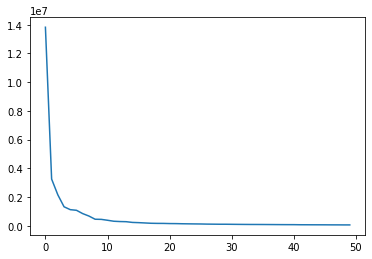

In [117]:
plt.plot(pca.explained_variance_)
plt.show()

In [121]:
cumsum_var=np.cumsum(pca.explained_variance_) # cumulative sum 누적합계

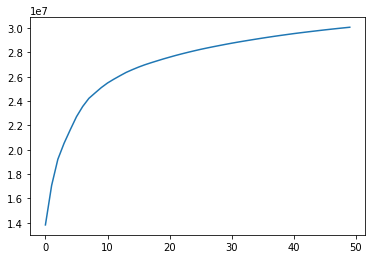

In [122]:
plt.plot(cumsum_var)
plt.show()

In [123]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645189, 0.00578896, 0.00511201, 0.00486383, 0.00480345,
       0.00447835, 0.00437318, 0.00408039, 0.00389463, 0.00372433,
       0.00359286, 0.00331467, 0.00317841, 0.00304342, 0.00303682,
       0.00288831, 0.00275861, 0.00264977, 0.00255781, 0.00251949,
       0.00247366, 0.00239282, 0.00230396, 0.00221208, 0.00216507,
       0.00213571, 0.00195677, 0.00192309, 0.00186176, 0.00184015,
       0.00180635, 0.00171101, 0.00168928, 0.00161621, 0.00159253])

In [124]:
cumsum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
cumsum_var_ratio

array([0.42357017, 0.52298772, 0.58876636, 0.62907807, 0.66324682,
       0.69606011, 0.72179277, 0.7423424 , 0.75606517, 0.76949289,
       0.78101436, 0.79046031, 0.79924263, 0.8077096 , 0.8146401 ,
       0.82109198, 0.82688094, 0.83199294, 0.83685677, 0.84166022,
       0.84613857, 0.85051175, 0.85459214, 0.85848677, 0.86221111,
       0.86580396, 0.86911863, 0.87229704, 0.87534046, 0.87837728,
       0.88126559, 0.8840242 , 0.88667397, 0.88923178, 0.89175126,
       0.89422493, 0.89661774, 0.89892171, 0.90113379, 0.90329885,
       0.90543456, 0.90739133, 0.90931442, 0.91117618, 0.91301632,
       0.91482268, 0.91653368, 0.91822296, 0.91983918, 0.92143171])

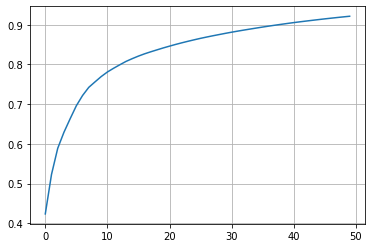

In [125]:
plt.plot(cumsum_var_ratio)
plt.grid()
plt.show()

## 주성분 개수 선택

In [126]:
pca = PCA() # 주성분 분석 객체 생성
pca.fit(fruits_2d) # 주성분 분석 학습
pca.components_.shape # pca가 찾은 주성분 

(300, 10000)

In [133]:
cumsum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
cumsum_var_ratio[-10:]

array([0.99990994, 0.99992336, 0.9999362 , 0.99994888, 0.99996113,
       0.99997293, 0.99998405, 0.99999216, 1.        , 1.        ])

In [151]:
d = np.argmax(cumsum_var_ratio >=0.95)
d
# 73번의 인덱스지만 주성분의 개수는 실제 74개 (인덱스는 0에서부터 시작하니까
# 95% 이상이 되는 주성분의 갯수 = 74

73

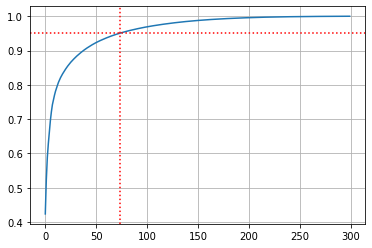

In [155]:
plt.plot(cumsum_var_ratio)
# 200개 근방에만 가도 1에 가까워지는걸 알 수 있음.
plt.axhline(y=0.95, linestyle=':', color='red' )
# horizontal line
plt.axvline(x=d, linestyle=':', color='red')
# vertical line

plt.grid()
plt.show()

* 데이터 셋 전체 분산의 95%를 설명하는 주성분 분석

In [156]:
# n_components: 정수(주성분의 갯수), 0~1 실수(주성분으로 설명되는 분산의 비율)
pca = PCA(n_components=0.95)
pca.fit(fruits_2d)
pca.components_.shape

(74, 10000)

In [157]:
# 차원 축소
fruits_2d_pca = pca.transform(fruits_2d)
fruits_2d_pca.shape 
# 컬럼의 갯수가 74개가 되어야 차원 축소가 완료.

(300, 74)

In [159]:
# 다시 재구성
fruits_2d_inv = pca.inverse_transform(fruits_2d_pca)
fruits_2d_inv.shape
# 원본 데이터와 다르지만 shape는 같음.

(300, 10000)

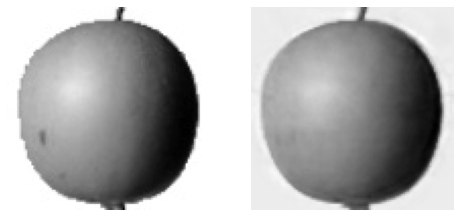

In [160]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
ax[0].imshow(fruits[0], cmap=plt.cm.binary)
ax[0].axis('off')
img = fruits_2d_inv[0].reshape((100,100))
ax[1].imshow(img, cmap=plt.cm.binary)
ax[1].axis('off')

plt.show()

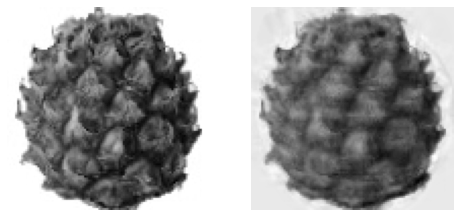

In [161]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
ax[0].imshow(fruits[100], cmap=plt.cm.binary)
ax[0].axis('off')
img = fruits_2d_inv[100].reshape((100,100))
ax[1].imshow(img, cmap=plt.cm.binary)
ax[1].axis('off')

plt.show()

## PCA 응용: 시각화

In [165]:
pca = PCA(n_components=2)
# pca.fit(fruits_2d)
# fruits_2d_pca = pca.trainsform(fruits_2d)
fruits_2d_pca = pca.fit_transform(fruits_2d)
fruits_2d_pca.shape
# 차원을 축소 시킨 후 > 시각화 하는 방법

(300, 2)

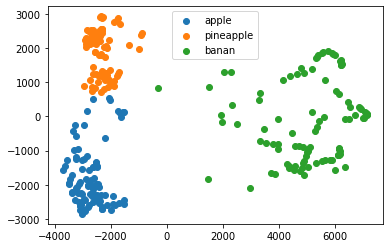

In [168]:
plt.scatter(fruits_2d_pca[:100,0], fruits_2d_pca[:100,1], label='apple')
plt.scatter(fruits_2d_pca[100:200,0], fruits_2d_pca[100:200,1], label='pineapple')
plt.scatter(fruits_2d_pca[200:300,0], fruits_2d_pca[200:300,1], label='banan')

plt.legend()
plt.show()

## PCA응용: 전처리

In [170]:
X = fruits_2d # data
y = np.array([0]*100 + [1]*100 + [2]*100) # target
# 지도학습 하려면 target이 있어야하므로 y를 지정.

### PCA 사용전

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [175]:
logistic = LogisticRegression(random_state=42, n_jobs=-1)

In [177]:
cv = cross_validate(estimator=logistic, X=X, y=y, 
                    n_jobs=-1, return_train_score=True)
# 전부 키워드방식으로 저장해야한다.

In [179]:
cv.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [182]:
np.mean(cv['fit_time'])

2.13759446144104

In [183]:
np.mean(cv['train_score'])

1.0

In [184]:
np.mean(cv['test_score'])

0.9966666666666667

### PCA 적용 후

In [191]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

In [186]:
X.shape, X_pca.shape

((300, 10000), (300, 50))

In [195]:
cv = cross_validate(estimator=LogisticRegression(random_state=42, n_jobs=-1),
                    X=X_pca, y=y, n_jobs=-1, return_train_score=True)

In [197]:
np.mean(cv['fit_time'])

0.16834492683410646

In [198]:
np.mean(cv['train_score'])

1.0

In [199]:
np.mean(cv['test_score'])

1.0

## MNIST

MNIST 데이터 셋에서 주성분 2개를 찾고, 변환된 데이터들을 2차원 평면에 시각화.

In [206]:
from sklearn.datasets import fetch_openml

In [207]:
X, y = fetch_openml(name='mnist_784', return_X_y=True)

In [208]:
X.shape  # (n_samples, n_features)

(70000, 784)

In [209]:
y.shape  # (n_samples,)

(70000,)

In [210]:
pca = PCA(n_components=2)

In [211]:
pca.fit(X)

PCA(n_components=2)

In [212]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

In [213]:
X_pca = pca.transform(X)

In [214]:
X_pca.shape

(70000, 2)

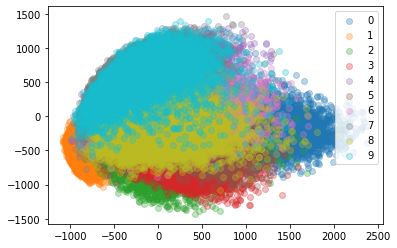

In [216]:
for n in np.unique(y):
    plt.scatter(X_pca[y==n,0], X_pca[y==n,1],
                alpha=0.3, label=f'{n}')
plt.legend()
plt.show()